<a href="https://colab.research.google.com/github/acastellanos-ie/machine_learning_2/blob/master/data_cleaning_practice/practice_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Configuration

**Execute this steps to configure the Google Colab environment in order to execute this notebook. It is not required if you are executing it locally and you have properly configured your local environment according to what explained in the Github Repository.**

The first step is to clone the repository to have access to all the data and files.

In [ ]:
repository_url = 'https://github.com/acastellanos-ie/machine_learning_2'

In [ ]:
! git clone $repository_url

Cloning into 'machine_learning_2'...
fatal: could not read Username for 'https://github.com': No such device or address


Install the requirements

In [ ]:
! pip install -Uqqr machine_learning_2/requirements.txt

Go to the practice directory



In [ ]:
%cd machine_learning_2/data_cleaning_practice

Ensure that you have the GPU runtime activated:

![](https://miro.medium.com/max/3006/1*vOkqNhJNl1204kOhqq59zA.png)

Now you have everything you need to execute the code in Colab

The following cell includes some imports that we will need in the rest of the practice

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv

In the following sections, we will cover some of the most important steps for Data Cleaning. We have covered them in class, but I want to show you how they work in practice and the impact that they can have on your Machine Learning solutions.

This practice is not a guideline that you must follow step by step. I just wanted to compile them all in the same notebook to refer to it when you are implementing your own solutions. Even if you need to adapt them to your datasets and the particular scenario you are trying to solve, you will have the pointers to know where you can start.

Please also consider that this is not an exhaustive list of solutions. Feel free to keep researching if you need more advanced methodologies. In any case, the solutions and examples included in this practice will help you solve most of the ML problems you will face in the future.

**Disclaimer**: Most of this code comes from the two following resources:
- Scikit-learn Documentation: I recommend you check out the Documentation for more details and examples (not only for this practice but also for the rest of the course).
- Introduction to Machine Learning with Python (Book): The book focuses not only on Data Cleaning but also on the entire ML process. I do recommend you to check it out for more examples.

# Scaling

Let's start by talking about scaling. I hope that after the theoretical session, you are aware of the importance of scaling your data. In this practice, I will introduce you to the different scalers that sklearn provides and how to use them correctly in practice.

For more details, please refer to: https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

Do not be scared with the following piece of code. It only creates a dataset with 2 features that have different scales. Then, it applies 4 different scalers, and it plots the dataset transformed according to each of them. In particular, the following scalers are used:


In any case, the code itself is not important. I want you to pay attention to the resultant datasets, focusing on the transformations generated by each Scaler. Bear that in mind when you need to apply them in the feature to apply the one that is more suited for your data.



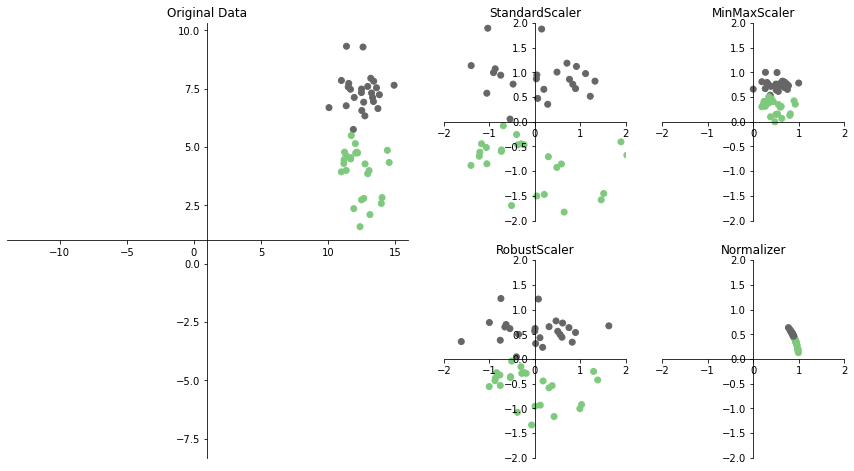

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

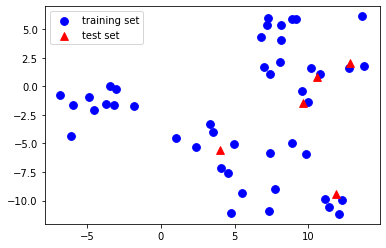

In [ ]:
# Generate the dataset
X, y = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=5, test_size=.1)

# plot the training and test set
plt.scatter(X_train[:, 0], X_train[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', c='r', label="test set", s=60)
plt.legend(loc='upper left');


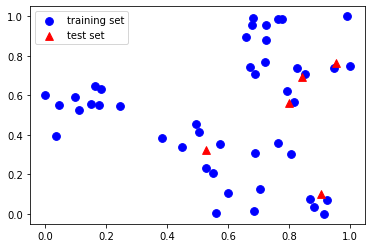

In [ ]:
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c='r', label="test set", s=60);
plt.legend(loc='upper left');

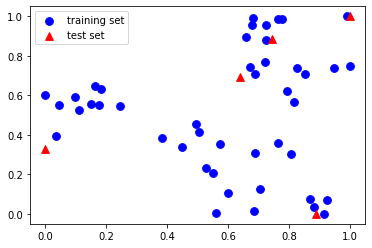

In [ ]:
# rescale the test set separately, so that test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
plt.scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c='r', label="test set", s=60)
plt.legend(loc='upper left');

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.8

### Feature Distribution

In [ ]:
from sklearn.datasets import fetch_openml

data = fetch_openml("house_sales", as_frame=True)
target = data.frame.price
df = data.frame.drop(['date', 'price', 'zipcode'], axis=1)

X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


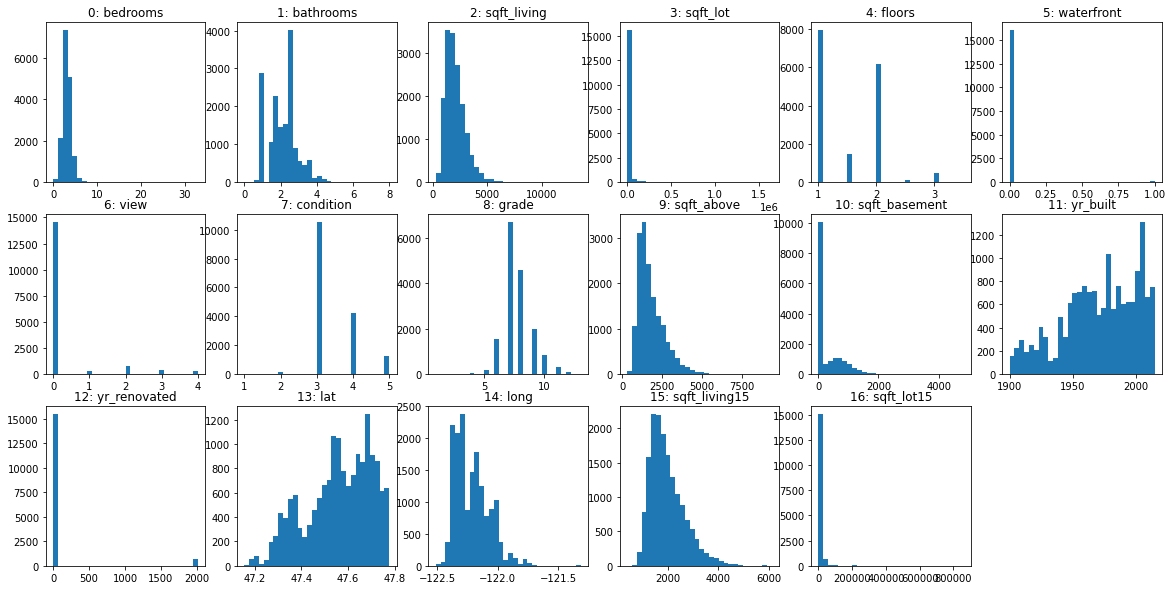

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X_train.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, X.columns[i]))

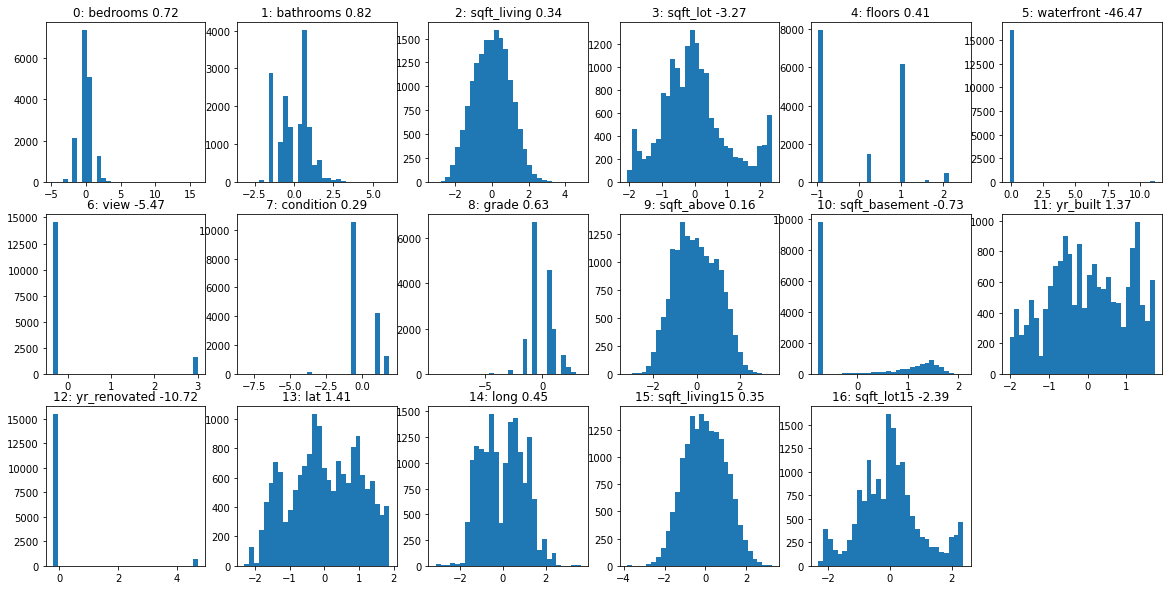

In [ ]:

from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(3, 6, figsize=(20, 10))
pt = PowerTransformer()
X_bc = pt.fit_transform(X_train_scaled)

for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    ax.hist(X_bc[:, i], bins=30)
    ax.set_title("{}: {} {:.2f}".format(i, X.columns[i], pt.lambdas_[i]))

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.6940091829802499, 0.02732963221745279)

In [ ]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
print(np.mean(scores), np.std(scores))

0.6939895312756573 0.027401937047029847


In [ ]:
scores = cross_val_score(RidgeCV(), X_bc, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.6070304540760556, 0.02746838870410249)

# Categorical Columns

In [ ]:
import pandas as pd
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [ ]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan', 'salary']]
df

,boro,boro_ordinal,vegan,salary
0,Manhattan,2,No,103
1,Queens,3,No,89
2,Manhattan,2,No,142
3,Brooklyn,1,Yes,54
4,Brooklyn,1,Yes,63
5,Bronx,0,No,219


In [ ]:
pd.get_dummies(df)

,boro_ordinal,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,2,103,0,0,1,0,1,0
1,3,89,0,0,0,1,1,0
2,2,142,0,0,1,0,1,0
3,1,54,0,1,0,0,0,1
4,1,63,0,1,0,0,0,1
5,0,219,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
# The Future!

categorical = df.dtypes == object

preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

model = make_pipeline(preprocess, LogisticRegression())

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)
target = data.frame.price

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [ ]:
X = data.frame.drop(['date', 'price'], axis=1)
y = target

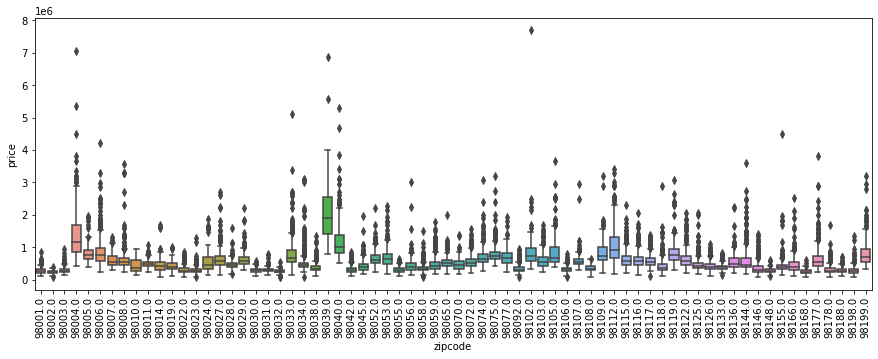

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x=data.frame.zipcode, y=data.frame.price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

scores = cross_val_score(Ridge(), X, target)
np.mean(scores)

0.6945962843967515

In [ ]:
X = data.frame.drop(['date', 'price'], axis=1)

pipe_ohe = make_pipeline(make_column_transformer((OneHotEncoder(), ['zipcode']), remainder='passthrough'), Ridge())
scores = cross_val_score(pipe_ohe, X, target)
np.mean(scores)


0.5338344703914251

In [ ]:
! pip install -qq category_encoders
from category_encoders import TargetEncoder

pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())
scores = cross_val_score(pipe_target, X, target)
np.mean(scores)

0.7862175426353509

# Outliers

In [ ]:

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

pipe = make_pipeline(LinearRegression())
cross_val_score(pipe, X, y, cv=5)


array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.linear_model import LinearRegression


for od in [IsolationForest(), EllipticEnvelope(), LocalOutlierFactor(), OneClassSVM()]:

  yhat = od.fit_predict(X)

  # select all rows that are not outliers
  mask = yhat != -1
  X_without_outliers, y_withouth_outliers = X[mask, :], y[mask]

  pipe = make_pipeline(LinearRegression())
  print(cross_val_score(pipe, X_without_outliers, y_withouth_outliers, cv=5))

[ 0.6006483   0.71114569  0.6595133   0.08974425 -0.70274115]
[ 0.62675426  0.7040996   0.54880932  0.31983642 -6.41373921]
[ 0.60145967  0.56046046  0.58242692 -0.01021429 -3.17066612]
[ 0.55393221 -0.05319951  0.43011503  0.8045749  -0.27712592]


# Binning

In [ ]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

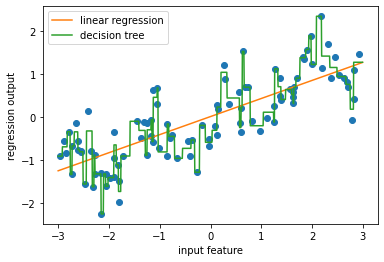

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = make_wave(n_samples=100)
plt.plot(X[:, 0], y, 'o')

line = np.linspace(-3, 3, 1000)[:-1].reshape(-1, 1)
reg = LinearRegression().fit(X, y)

plt.plot(line, reg.predict(line), label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.plot(line, reg.predict(line), label="decision tree")
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.legend(loc="best");

In [ ]:
np.set_printoptions(precision=2)
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

which_bin = np.digitize(X, bins=bins)

# transform using the OneHotEncoder.
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


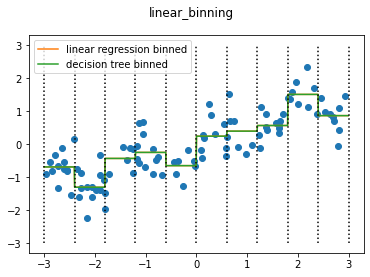

In [ ]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
plt.plot(X[:, 0], y, 'o')
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
for bin in bins:
  plt.plot([bin, bin], [-3, 3], ':', c='k')
  plt.legend(loc="best")
  plt.suptitle("linear_binning")

# Null Values

## Univariate vs. Multivariate Imputation

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).



### Univariate: SimpleImputer

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

The following snippet demonstrates how to replace missing values, encoded as np.nan, using the mean value of the columns (axis 0) that contain the missing values:

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


strategystr, default=’mean’
The imputation strategy.

If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

In [ ]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


### Multivariate: IterativeImputer

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [ ]:

X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
# the model learns that the second feature is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


### KNN Imputer

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform. For more information on the methodology, see ref. [OL2001].



In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)


array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## Mark imputed values


In [ ]:
from sklearn.impute import MissingIndicator
X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])
indicator = MissingIndicator(missing_values=-1)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only  

array([[ True,  True, False],
       [False,  True,  True],
       [False,  True, False]])

The features parameter is used to choose the features for which the mask is constructed. By default, it is 'missing-only' which returns the imputer mask of the features containing missing values at fit time:



In [ ]:
indicator.features_


array([0, 1, 2, 3])

The features parameter can be set to 'all' to return all features whether or not they contain missing values:



In [ ]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
mask_all

array([[ True,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False]])

In [ ]:
indicator.features_

array([0, 1, 2, 3])

## Everything together: Pipelines



In [ ]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
X, y = load_iris(return_X_y=True)

# Randomly assing null values to 20% of the dataset
mask = np.random.randint(0, 2, size=X.shape).astype(bool)
X[mask] = np.nan

Now we create a FeatureUnion. All features will be imputed using SimpleImputer, in order to enable classifiers to work with this data. Additionally, it adds the indicator variables from MissingIndicator.



In [ ]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='mean')),
        ('indicators', MissingIndicator())])

Of course, we cannot use the transformer to make any predictions. We should wrap this in a Pipeline with a classifier (e.g., a Logistic Regression) to be able to make predictions.



In [ ]:
clf = make_pipeline(transformer, LogisticRegression(max_iter=1000))
cross_val_score(clf, X, y, cv=5)

array([0.8       , 1.        , 0.86666667, 0.76666667, 0.9       ])